In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Y_train = np.loadtxt('data/train.txt').astype(int)
Y_test = np.loadtxt('data/test.txt').astype(int)

In [3]:
# Solution set for CS 155 Set 6, 2016/2017
# Authors: Fabian Boemer, Sid Murching, Suraj Nair

import numpy as np

def grad_U(Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    return (1-reg*eta)*Ui + eta * Vj * (Yij - np.dot(Ui,Vj))     

def grad_V(Vj, Yij, Ui, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    return (1-reg*eta)*Vj + eta * Ui * (Yij - np.dot(Ui,Vj))

def get_err(U, V, Y, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    # Compute mean squared error on each data point in Y; include
    # regularization penalty in error calculations.
    # We first compute the total squared squared error
    err = 0.0
    for (i,j,Yij) in Y:
        err += 0.5 *(Yij - np.dot(U[i-1], V[:,j-1]))**2
    # Add error penalty due to regularization if regularization
    # parameter is nonzero
    if reg != 0:
        U_frobenius_norm = np.linalg.norm(U, ord='fro')
        V_frobenius_norm = np.linalg.norm(V, ord='fro')
        err += 0.5 * reg * (U_frobenius_norm ** 2)
        err += 0.5 * reg * (V_frobenius_norm ** 2)
    # Return the mean of the regularized error
    return err / float(len(Y))

def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    # Initialize U, V  
    U = np.random.random((M,K)) - 0.5
    V = np.random.random((K,N)) - 0.5
    size = Y.shape[0]
    delta = None
    indices = np.arange(size)    
    for epoch in range(max_epochs):
        # Run an epoch of SGD
        before_E_in = get_err(U, V, Y, reg)
        np.random.shuffle(indices)
        for ind in indices:
            (i,j, Yij) = Y[ind]
            # Update U[i], V[j]
            U[i-1] = grad_U(U[i-1], Yij, V[:,j-1], reg, eta)
            V[:,j-1] = grad_V(V[:,j-1], Yij, U[i-1], reg, eta);
        # At end of epoch, print E_in
        E_in = get_err(U, V, Y, reg)
        print("Epoch %s, E_in (regularized MSE): %s"%(epoch + 1, E_in))

        # Compute change in E_in for first epoch
        if epoch == 0:
            delta = before_E_in - E_in

        # If E_in doesn't decrease by some fraction <eps>
        # of the initial decrease in E_in, stop early            
        elif before_E_in - E_in < eps * delta:
            break
    return (U, V, get_err(U, V, Y))

In [4]:
M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
print("Factorizing with ", M, " users, ", N, " movies.")
K = 20 
regs = [10**-4, 10**-3, 10**-2, 10**-1, 1]
eta = 0.03 # learning rate
E_in = []
E_out = []

Factorizing with  943  users,  1682  movies.


In [5]:
for reg in regs:

    print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s"%(M, N, K, eta, reg))
    U,V, e_in = train_model(M, N, K, eta, reg, Y_train)
    E_in.append(e_in)
    eout = get_err(U, V, Y_test)
    E_out.append(eout)

Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.0001
Epoch 1, E_in (regularized MSE): 0.525808890138
Epoch 2, E_in (regularized MSE): 0.395897617395
Epoch 3, E_in (regularized MSE): 0.352492290482
Epoch 4, E_in (regularized MSE): 0.326289665453
Epoch 5, E_in (regularized MSE): 0.31189639124
Epoch 6, E_in (regularized MSE): 0.296825977592
Epoch 7, E_in (regularized MSE): 0.284580965501
Epoch 8, E_in (regularized MSE): 0.276456165224
Epoch 9, E_in (regularized MSE): 0.271007755727
Epoch 10, E_in (regularized MSE): 0.266318913561
Epoch 11, E_in (regularized MSE): 0.26141769602
Epoch 12, E_in (regularized MSE): 0.262316154527
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.001
Epoch 1, E_in (regularized MSE): 0.531484829125
Epoch 2, E_in (regularized MSE): 0.401413611364
Epoch 3, E_in (regularized MSE): 0.358250208599
Epoch 4, E_in (regularized MSE): 0.328793417566
Epoch 5, E_in (regularized MSE): 0.31143232353
Epoch 6, E_in (regularized MSE): 0.294947

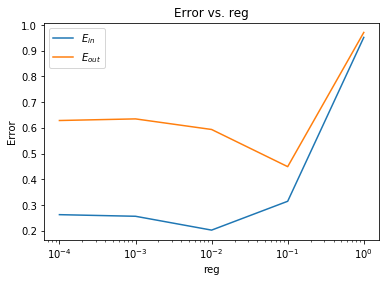

In [6]:
plt.plot(regs, E_in, label='$E_{in}$')
plt.plot(regs, E_out, label='$E_{out}$')
plt.xscale('log')
plt.title('Error vs. reg')
plt.xlabel('reg')
plt.ylabel('Error')
plt.legend()
plt.show()

In [7]:
regs = [0.06, 0.08, 0.1, 0.12, 0.14]
E_in2 = []
E_out2 = []
for reg in regs:

    print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s"%(M, N, K, eta, reg))
    U,V, e_in = train_model(M, N, K, eta, reg, Y_train)
    E_in2.append(e_in)
    eout = get_err(U, V, Y_test)
    E_out2.append(eout)

Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.06
Epoch 1, E_in (regularized MSE): 0.508109036896
Epoch 2, E_in (regularized MSE): 0.416707766461
Epoch 3, E_in (regularized MSE): 0.379977712738
Epoch 4, E_in (regularized MSE): 0.357065825376
Epoch 5, E_in (regularized MSE): 0.338408847778
Epoch 6, E_in (regularized MSE): 0.323101228985
Epoch 7, E_in (regularized MSE): 0.309021241362
Epoch 8, E_in (regularized MSE): 0.29777414585
Epoch 9, E_in (regularized MSE): 0.290362539376
Epoch 10, E_in (regularized MSE): 0.283109822721
Epoch 11, E_in (regularized MSE): 0.275937986183
Epoch 12, E_in (regularized MSE): 0.270600123944
Epoch 13, E_in (regularized MSE): 0.261754656704
Epoch 14, E_in (regularized MSE): 0.257854327749
Epoch 15, E_in (regularized MSE): 0.255998255808
Epoch 16, E_in (regularized MSE): 0.254796142618
Epoch 17, E_in (regularized MSE): 0.248434893365
Epoch 18, E_in (regularized MSE): 0.247404658358
Epoch 19, E_in (regularized MSE): 0.245442577791
Epoch 20,

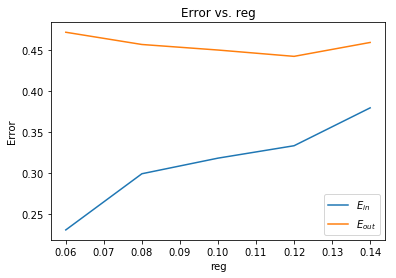

In [8]:
plt.plot(regs, E_in2, label='$E_{in}$')
plt.plot(regs, E_out2, label='$E_{out}$')
plt.title('Error vs. reg')
plt.xlabel('reg')
plt.ylabel('Error')
plt.legend()
plt.show()

In [9]:
eps = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1]
reg = 0.1
E_in3 = []
E_out3 = []
for ep in eps:

    print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s"%(M, N, K, eta, reg))
    U,V, e_in = train_model(M, N, K, eta, reg, Y_train, ep)
    E_in3.append(e_in)
    eout = get_err(U, V, Y_test)
    E_out3.append(eout)

Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.1
Epoch 1, E_in (regularized MSE): 0.507613153134
Epoch 2, E_in (regularized MSE): 0.431383746744
Epoch 3, E_in (regularized MSE): 0.403596672445
Epoch 4, E_in (regularized MSE): 0.389584301454
Epoch 5, E_in (regularized MSE): 0.373985936767
Epoch 6, E_in (regularized MSE): 0.363023959771
Epoch 7, E_in (regularized MSE): 0.358724967524
Epoch 8, E_in (regularized MSE): 0.34690065586
Epoch 9, E_in (regularized MSE): 0.340836214044
Epoch 10, E_in (regularized MSE): 0.333319537973
Epoch 11, E_in (regularized MSE): 0.328067955947
Epoch 12, E_in (regularized MSE): 0.327525709601
Epoch 13, E_in (regularized MSE): 0.321027723108
Epoch 14, E_in (regularized MSE): 0.31747382762
Epoch 15, E_in (regularized MSE): 0.315592693907
Epoch 16, E_in (regularized MSE): 0.310129959473
Epoch 17, E_in (regularized MSE): 0.306726914975
Epoch 18, E_in (regularized MSE): 0.305663119477
Epoch 19, E_in (regularized MSE): 0.303501666784
Epoch 20, E

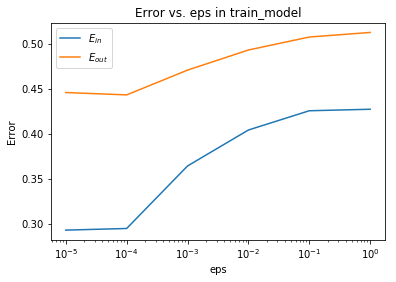

In [14]:
plt.plot(eps, E_in3, label='$E_{in}$')
plt.plot(eps, E_out3, label='$E_{out}$')
plt.xscale('log')
plt.title('Error vs. eps in train_model')
plt.xlabel('eps')
plt.ylabel('Error')
plt.legend()
plt.show()